# Sentiment Analysis on Movie Reviews

## 1. Problem Description:

<p>
Opinion mining or sentiment analysis aims to determine the attitude of a critic or customer or other subject with respected to a topic. And in this project the goal is to figure out the attitude of critics towards various movies, predict the result of test set, and evaluate the model.
</p>
<p>Cognitive insight is important for online streaming or shopping website, because it can help to predict whether customers like or dislike a movie or other products. When they submit a new comment, the website can offer some feedback according to customers’ attitude. And in this project, the data is from kaggle.com.
</p>
<p>And the goal of the project is to produce an algorithm to classify phrases into 5 categories: negative, somewhat negative, neutral, somewaht postive and positive.
</p>

In [130]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
senti_known= pd.read_csv('train.tsv/train.tsv',delimiter='\t',encoding='utf-8')
senti_unknown = pd.read_csv('test.tsv/test.tsv',delimiter='\t',encoding='utf-8')

## 2. Load the Dataset and Have a First Look

### 2.1 Data set with sentiment labels

In [115]:
senti_known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [99]:
senti_known.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


### 2.2 Five sentiment levels

In [101]:
Sentiment = set()
for i in senti_known.Sentiment:
    Sentiment.add(i)
print(Sentiment)

{0, 1, 2, 3, 4}


- 0 : negative
- 1 : somewhat negative
- 2 : neutral
- 3 : somewhat positive
- 4 : positive

### 2.3 Data set without sentiment labels

In [116]:
senti_unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [102]:
senti_unknown.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


## 3. Preprocessing of Text: Vectorizer

### 3.1 Count Vectorizer

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create a series to store the labels: y
y = senti_known['Sentiment']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(senti_known.Phrase,y,test_size=0.33,random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words= "english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['000', '10', '100', '101', '102', '103', '104', '105', '10th', '11']


### 3.2 Tfidf Vectorizer

In [105]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train[:5])

['000', '10', '100', '101', '102', '103', '104', '105', '10th', '11']
  (0, 2148)	0.710380191113
  (0, 5437)	0.461241602095
  (0, 8522)	0.531616561604
  (1, 2559)	0.590848100277
  (1, 11239)	0.635172612276
  (1, 5571)	0.49744776109
  (2, 6550)	0.690622630263
  (2, 555)	0.472487683103
  (2, 13534)	0.547536091856
  (3, 8819)	0.83865106412
  (3, 11480)	0.544669067095
  (4, 10196)	1.0


## 4. Modeling, Evaluation and Improving the Model

### 4.1 Train and evaluate the multinomial naive bayes model by the training data with count vectorier

In [117]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)
print(pred)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm =  metrics.confusion_matrix(y_test,pred,labels=[0,1,2,3,4])
print(cm)


[1 2 2 ..., 2 3 2]
0.603553398058
[[  635  1063   532    81     4]
 [  581  3720  4271   531    29]
 [  221  2246 20577  2939   200]
 [   34   400  4344  5347   656]
 [    2    40   535  1708   804]]


### 4.2 Improving the model of 4.1 by tweaking alpha level 

In [119]:
# Create the list of alphas: alphas
alphas = np.arange(0,5,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(count_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(count_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0


C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.592834951456

Alpha:  0.1
Score:  0.595184466019

Alpha:  0.2
Score:  0.596563106796

Alpha:  0.3
Score:  0.598019417476

Alpha:  0.4
Score:  0.598932038835

Alpha:  0.5
Score:  0.599902912621

Alpha:  0.6
Score:  0.601805825243

Alpha:  0.7
Score:  0.602582524272

Alpha:  0.8
Score:  0.603048543689

Alpha:  0.9
Score:  0.603398058252

Alpha:  1.0
Score:  0.603553398058

Alpha:  1.1
Score:  0.604213592233

Alpha:  1.2
Score:  0.603844660194

Alpha:  1.3
Score:  0.603941747573

Alpha:  1.4
Score:  0.604213592233

Alpha:  1.5
Score:  0.605495145631

Alpha:  1.6
Score:  0.606058252427

Alpha:  1.7
Score:  0.606291262136

Alpha:  1.8
Score:  0.606621359223

Alpha:  1.9
Score:  0.607184466019

Alpha:  2.0
Score:  0.607281553398

Alpha:  2.1
Score:  0.606873786408

Alpha:  2.2
Score:  0.60640776699

Alpha:  2.3
Score:  0.605902912621

Alpha:  2.4
Score:  0.606252427184

Alpha:  2.5
Score:  0.606077669903

Alpha:  2.6
Score:  0.605844660194

Alpha:  2.7
Score:  0.605980582524

Alpha

### 4.3 Train and evaluate the multinomial naive bayes model by the training data with tfidf vectorier

In [118]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=[0,1,2,3,4])
print(cm)


0.584640776699
[[   96   940  1231    48     0]
 [   47  2458  6322   301     4]
 [   19  1151 23251  1740    22]
 [    3   136  6408  4166    68]
 [    0    11  1125  1815   138]]


### 4.4 Improving the model of 4.3 by tweaking alpha level

In [141]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.01)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0


C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.592893203883

Alpha:  0.01
Score:  0.592951456311

Alpha:  0.02
Score:  0.592990291262

Alpha:  0.03
Score:  0.592718446602

Alpha:  0.04
Score:  0.592796116505

Alpha:  0.05
Score:  0.592932038835

Alpha:  0.06
Score:  0.592796116505

Alpha:  0.07
Score:  0.59254368932

Alpha:  0.08
Score:  0.592504854369

Alpha:  0.09
Score:  0.592427184466

Alpha:  0.1
Score:  0.592660194175

Alpha:  0.11
Score:  0.59254368932

Alpha:  0.12
Score:  0.59254368932

Alpha:  0.13
Score:  0.592466019417

Alpha:  0.14
Score:  0.592330097087

Alpha:  0.15
Score:  0.591941747573

Alpha:  0.16
Score:  0.591631067961

Alpha:  0.17
Score:  0.591572815534

Alpha:  0.18
Score:  0.591669902913

Alpha:  0.19
Score:  0.591495145631

Alpha:  0.2
Score:  0.591631067961

Alpha:  0.21
Score:  0.591417475728

Alpha:  0.22
Score:  0.591339805825

Alpha:  0.23
Score:  0.591126213592

Alpha:  0.24
Score:  0.591029126214

Alpha:  0.25
Score:  0.590893203883

Alpha:  0.26
Score:  0.590796116505

Alpha:  0.27
Score:

### 4.5  Inspect the model and explore the vector weights of actual words

In [140]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = count_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

0 [(-10.268495183013016, '10th'), (-10.268495183013016, '127'), (-10.268495183013016, '129'), (-10.268495183013016, '12th'), (-10.268495183013016, '13th'), (-10.268495183013016, '14'), (-10.268495183013016, '15th'), (-10.268495183013016, '16'), (-10.268495183013016, '163'), (-10.268495183013016, '168'), (-10.268495183013016, '170'), (-10.268495183013016, '1790'), (-10.268495183013016, '18'), (-10.268495183013016, '1899'), (-10.268495183013016, '1915'), (-10.268495183013016, '1930s'), (-10.268495183013016, '1933'), (-10.268495183013016, '1937'), (-10.268495183013016, '1938'), (-10.268495183013016, '1940s')]
1 [(-6.6309090232866303, 'dialogue'), (-6.5549231163087081, 'long'), (-6.5189911070826447, 'lrb'), (-6.5072950673194541, 'action'), (-6.5072950673194541, 'way'), (-6.4618326932426964, 'plot'), (-6.4618326932426964, 'rrb'), (-6.4507828570561117, 'dull'), (-6.4183475813029576, 'worst'), (-6.3766748849023891, 'does'), (-6.3564721775848696, 'story'), (-6.3076820134154383, 'minutes'), (-6

## 5. Predict the Sentiment labels of Sentiment_unknow Set

[3 3 2 ..., 2 2 1]


(array([   368.,      0.,   6545.,      0.,      0.,  46266.,      0.,
         12303.,      0.,    810.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

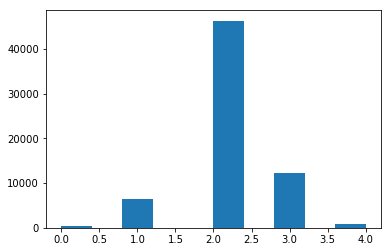

In [131]:
X_senti_unknown = senti_unknown.Phrase
count_senti_unknown = count_vectorizer.transform(X_senti_unknown)
# Instantiate the classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=2.0)
# Fit to the training data
nb_classifier.fit(count_train,y_train)
pred_senti_unknown = nb_classifier.predict(count_senti_unknown)
print(pred_senti_unknown)
plt.hist(pred_senti_unknown)

## 6.Conclusion:
In this project, a mutilnomial model is built to analyze the sentiment of moie reviews. Compared with tfidf vectoriser, count vectoriser is a better choice. And best alpha is 2.0 for the model trained by data with count vectoriser, while it's 0.02 for tfidf vectoriser. And best accuracy score with this model is 6.07. 